# Current Population Survey Random Forest Classification
A random forest estimator is an ensemble estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. We use the n_estimators value to set the number of trees in the forest, and max_depth to increase the maximum tree depth. For consistency, we will set n_estimators=15 for each model, and score models at increasing tree depths.

Predict whether an individuals family income is $50,000 or greater. Then predict whether an individual is married.

We are using only the numerical columns as predictors, along with the column 'ismarried' (binary) when predicting family income.

In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
from sklearn import ensemble
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
%matplotlib inline

In [2]:
# Import dataset
data = pd.read_csv("../datasets/CPS2016_UPDATE.csv",
                  usecols=['age','num_in_house', 'num_child', 
                'educ','weekly_hrs', 'ismarried', 'fam_income', 'faminc_50'])
# We are going to use the entire dataset for this model
# to test on a smaller sample uncomment below
# data = data.sample(n=1000)

# Apply 80/20 training/testing split
# Results may vary each time the data is split
data_train, data_test = train_test_split(data, test_size=0.2)
data.head()

,age,weekly_hrs,educ,fam_income,num_in_house,num_child,ismarried,faminc_50
0,28,40,11,11,6,4,0,0
1,44,50,13,16,5,2,1,1
2,23,20,9,14,3,0,0,1
3,20,20,7,9,5,0,0,0
4,20,20,9,13,4,0,0,1


In [3]:
# Function to plot binary categories
def getColor(arr):
    colorList = [];
    for x in arr:
        color = "magenta" if x == 1 else "green"
        colorList.append(color)
    return colorList;        

# Function to display scores at each increasing tree depth
# at a given depth
# Using 5-fold cross validation
def getRandomForestCVScores(X, Y):
    nb = np.arange(1,15)
    scorelist = []
    for d in nb:
        T = ensemble.RandomForestClassifier(max_depth=d, n_estimators=15)
        scores = cross_val_score(T, X, Y,
                                 cv=KFold(shuffle=True, n_splits=5), n_jobs=-1)
        scorelist.append(scores.mean())
        print(f"{d}:\t{scores.mean()}")
    
    print("max score: ", max(scorelist))
    print("tree-depth = ", scorelist.index(max(scorelist)) + 1)
    
# Function to display scores at each increasing estimator
# at a given depth
# using split data, returns graph
def getRandomForestScores(X, Y, xTest, yTest):
    depth = np.arange(1,15)
    score_train = []
    score_test = []
    print("Training", "   ", "Testing")
    for d in depth:
        T = ensemble.RandomForestClassifier(max_depth=d, n_estimators=15)
        T.fit(X,Y)
        s_train = T.score(X, Y)
        s_test = T.score(xTest, yTest)
        print(f"{d}:\t{s_train}:\t{s_test}")
        score_train.append(s_train)
        score_test.append(s_test)
    
    fig,ax = plt.subplots(1, figsize=(6,6), dpi=100)
    ax.plot(depth, score_train, label="training data")
    ax.plot(depth, score_test, label="testing data")
    ax.set_xlabel("tree depth")
    ax.set_ylabel("R2 score")
    fig.legend()
    plt.show()     
    
# function to plot Random Forest prediction with 2 input variables
def plotRandomForestTwoVars(x, y, target, depth):
    colorList = getColor(data_train[target])
    T2 = ensemble.RandomForestClassifier(max_depth=depth, n_estimators=15)
    T2.fit(data_train[[x,y]],data_train[target])

    x_min, x_max = 10, 90
    y_min, y_max = 0, 18
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 150),
                         np.linspace(y_min, y_max, 150))
    test = pd.DataFrame({'x1': xx.ravel(), 'x2': yy.ravel()})

    # Evaluate model
    colorPredict = getColor(T2.predict(test[['x1','x2']])) 

    fig,ax = plt.subplots(figsize=(8,8), dpi=100)
    ax.scatter(test['x1'], test['x2'], color=colorPredict, alpha=0.05)
    ax.scatter(data_train[x], data_train[y],  color=colorList, s=20, alpha=.2)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title("tree depth= " + str(depth))
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.show(fig)          

# Predict if Family Income >50,000
First, lets try using Random Forest Classification with only two input variables, 'age' and 'education' to predict if the family income is less than $50,000.

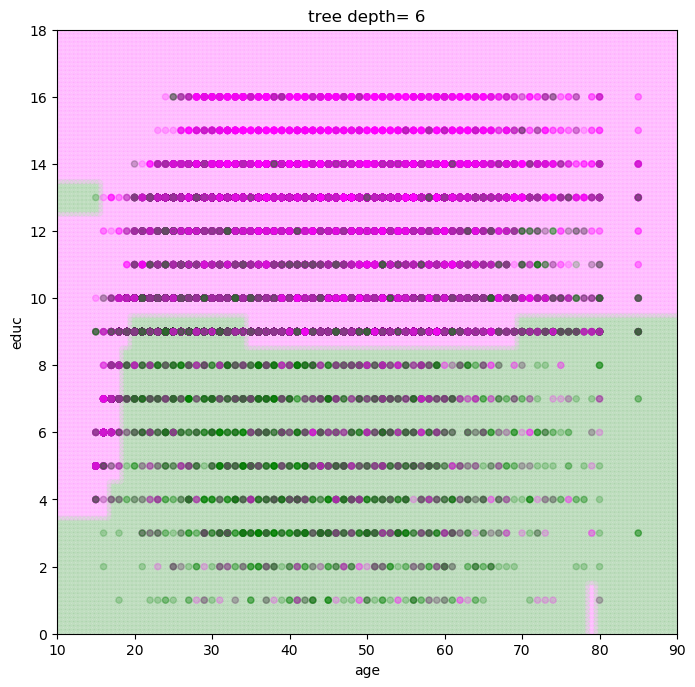

In [4]:
# Depth of 6
plotRandomForestTwoVars('age', 'educ', 'faminc_50', 6)    

# Score the model

We are going to score the model on a range of 1-14 tree depths, first with split data then using using cross-validation.

Training     Testing
1:	0.6649925342744673:	0.6683558049045335
2:	0.6713497126826841:	0.6730612614243054
3:	0.6897199221754672:	0.6901637860827075
4:	0.6968010497262568:	0.6971314813139082
5:	0.6977738563865888:	0.6996651886707085
6:	0.6985882991719832:	0.7014749796398516
7:	0.6989955205646803:	0.6996651886707085
8:	0.6999004569928963:	0.6996651886707085
9:	0.7004434188498257:	0.6991222513799656
10:	0.7012126148138094:	0.696950502216994
11:	0.7017782000814443:	0.6991222513799656
12:	0.701936563956382:	0.6957741380870509
13:	0.7022759151169631:	0.6965885440231653
14:	0.7022985385276684:	0.6955931589901366


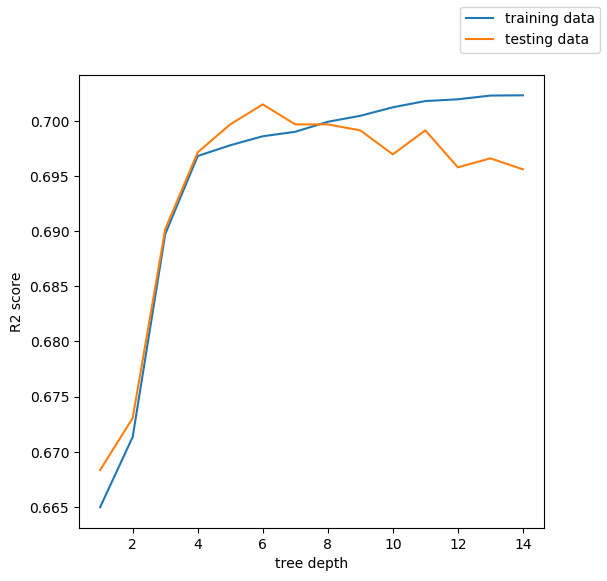

In [5]:
# Score using two input variables
getRandomForestScores(data_train[['age','educ']], data_train['faminc_50'],
                  data_test[['age','educ']], data_test['faminc_50'])

In [6]:
# Score using two input variables with cross validation
getRandomForestCVScores(data[['age','educ']], data['faminc_50'])

1:	0.6656650732044068
2:	0.6672578284719428
3:	0.68492220396508
4:	0.6945866891921494
5:	0.697663590977414
6:	0.6977178404853516
7:	0.6973919814795329
8:	0.6964146091895617
9:	0.696342201172597
10:	0.6950391418478948
11:	0.6936273263695961
12:	0.6935189223472744
13:	0.692668184652727
14:	0.6915280785793223
max score:  0.6977178404853516
tree-depth =  6


The model score peaked at around .698. This score is very close to the regular Decision Tree Classifier.

We are going to add the rest of the numerical variables (and 'ismarried' binary variable) as inputs (besides fam_income, because this is a numerical representation of family income) to predict if the family income is over $50,000.

Training     Testing
1:	0.6649925342744673:	0.6683558049045335
2:	0.6941541106737251:	0.6967695231200797
3:	0.7135649970589566:	0.7170391819744819
4:	0.7259626261255147:	0.7215636593973396
5:	0.7413012985837745:	0.7356800289566555
6:	0.7431564182616172:	0.7382137363134558
7:	0.7485181665987964:	0.740114016831056
8:	0.7529071082756437:	0.7429191928332277
9:	0.7575449074702502:	0.7444575151569993
10:	0.7636532283607077:	0.744276536060085
11:	0.7722501244287588:	0.7439145778662565
12:	0.7794669924437808:	0.7404759750248846
13:	0.790167865707434:	0.7421952764455705
14:	0.7999185557214605:	0.7379422676680844


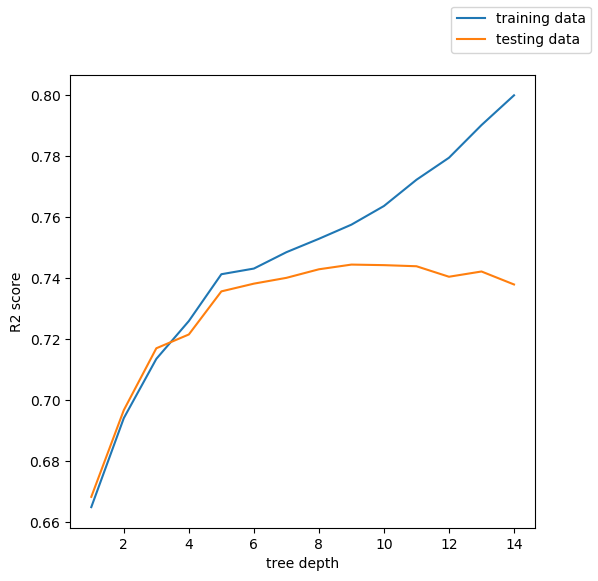

In [7]:
# Score with all numerical variables
getRandomForestScores(data_train[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs', 'ismarried']], data_train['faminc_50'],
                  data_test[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs', 'ismarried']], data_test['faminc_50'])

In [8]:
# Score with all numerical input variables (and ismarried) w/ cross validation
getRandomForestCVScores(data[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs', 'ismarried']], data['faminc_50'])

1:	0.6656651927652583
2:	0.6938627597019332
3:	0.7074549875914671
4:	0.7230554807390335
5:	0.734747498537222
6:	0.7420953956379124
7:	0.7429461546241182
8:	0.7453532273854949
9:	0.7454799717148506
10:	0.7452988517654265
11:	0.7435795356043616
12:	0.7442130001134191
13:	0.7408828913744625
14:	0.7393806060015453
max score:  0.7454799717148506
tree-depth =  9


Using the numerical variables 'age','num_in_house', 'num_child', 'educ' and 'weekly_hrs', the score for "family income greater than $50,000" peaked at .7375. This score is greater than knearest neighbors score and regular decision tree classification score.

# Predict if Individual is Married

First, lets try using Random Forest Classification with only two input variables, 'age' and 'education' to predict if an individual is married.

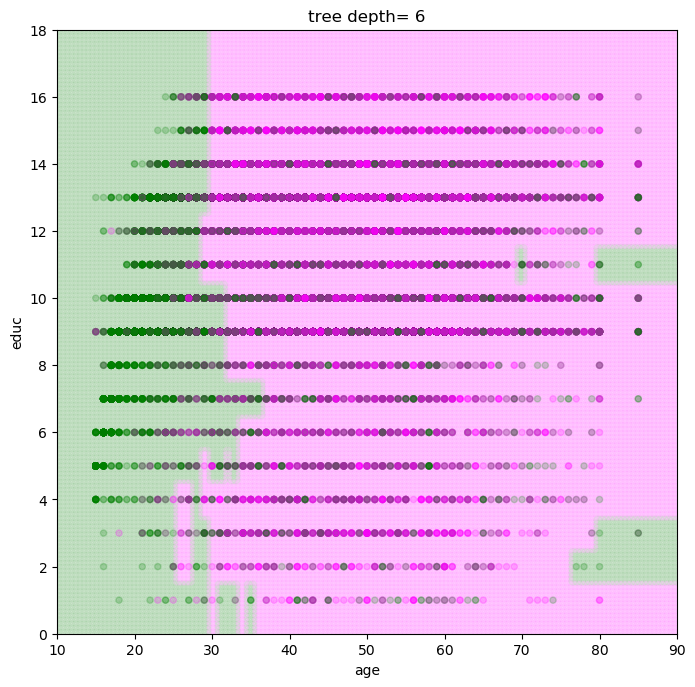

In [9]:
# Depth of 6
plotRandomForestTwoVars('age', 'educ', 'ismarried', 6)    

# Score the model

We are going to score the model on a range of 1-14 tree depths using cross-validation.

Training     Testing
1:	0.6908058458893263:	0.6883539951135644
2:	0.6924347314601149:	0.6897113383404216
3:	0.6940409936201982:	0.692245045697222
4:	0.6934301615311524:	0.6909781920188218
5:	0.6946065788878332:	0.6914306397611076
6:	0.696077100583684:	0.694054836666365
7:	0.697049907244016:	0.6957741380870509
8:	0.6978869734401159:	0.6961360962808796
9:	0.6984978055291616:	0.6926070038910506
10:	0.6989728971539749:	0.6890779115012217
11:	0.6997194697072531:	0.6926974934395077
12:	0.6998778335821908:	0.688715953307393
13:	0.7004660422605312:	0.6906162338249933
14:	0.7003076783855934:	0.6888064428558501


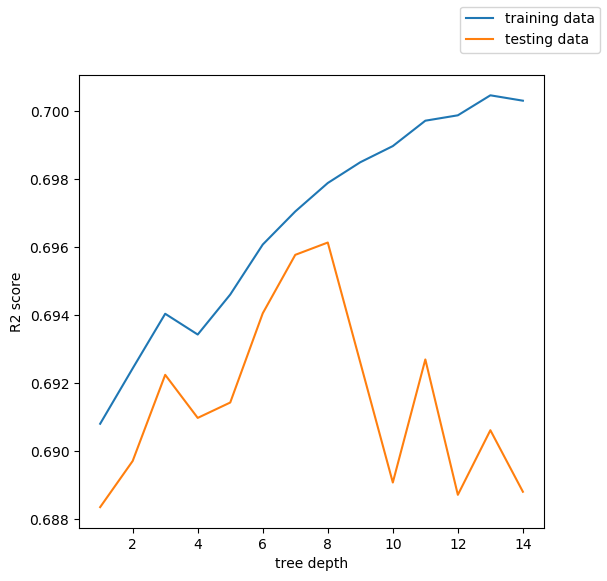

In [10]:
# Score using two input variables
getRandomForestScores(data_train[['age','educ']], data_train['ismarried'],
                  data_test[['age','educ']], data_test['ismarried'])

In [11]:
# Score using 2 input variables with cross validation
getRandomForestCVScores(data[['age','educ']], data['ismarried']) 

1:	0.6890123413822626
2:	0.6898630201152944
3:	0.6908221945885613
4:	0.6932654222238236
5:	0.6946047805505613
6:	0.6952021065639317
7:	0.6941341857639876
8:	0.6940618121412406
9:	0.6938084757997781
10:	0.6934826429990775
11:	0.6920347987590239
12:	0.6913108332367702
13:	0.6915461732133739
14:	0.6906774358783281
max score:  0.6952021065639317
tree-depth =  6


We are going to add the rest of the numerical variables as inputs to predict whether the individual is married.

Training     Testing
1:	0.7885842269580562:	0.7880734775133472
2:	0.796592914347767:	0.7980273278436341
3:	0.808243970861047:	0.8090670527554068
4:	0.7999864259535767:	0.7992941815220342
5:	0.8179041672322519:	0.8154013211474075
6:	0.8293742364598887:	0.8249932132838658
7:	0.8338310483688521:	0.828703284770609
8:	0.8393737839916746:	0.8330467830965523
9:	0.8415456314193928:	0.8341326576780382
10:	0.8472014840957423:	0.8344041263234097
11:	0.8511379575584815:	0.835218532259524
12:	0.859689606805122:	0.8363044068410098
13:	0.8678340346590652:	0.8341326576780382
14:	0.8745758110492738:	0.8333182517419238


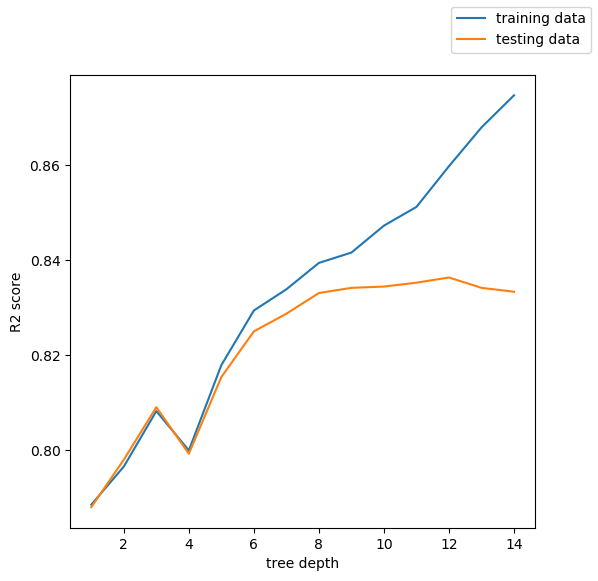

In [12]:
# Score with all numerical variables
getRandomForestScores(data_train[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs','fam_income']], data_train['ismarried'],
                  data_test[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs','fam_income']], data_test['ismarried'])

In [13]:
# Score with all numerical variables using Cross Validation
getRandomForestCVScores(data[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs', 'fam_income']], data['ismarried'])

1:	0.7790348900674824
2:	0.7899662191460325
3:	0.8007892179041557
4:	0.8097118329620259
5:	0.8179647156273813
6:	0.8250592534571307
7:	0.8289503662779438
8:	0.8339456202853819
9:	0.8331855997962553
10:	0.8365155414775838
11:	0.8364613558446218
12:	0.8374024946453528
13:	0.8352487254690409
14:	0.8358459761426967
max score:  0.8374024946453528
tree-depth =  12


Using the numerical variables 'age', 'num_in_house', 'num_child', 'fam_income', 'educ' and 'weekly_hrs', the score for "Is this individual married" peaked at .8374. This score is greater than knearest neighbors score and very close to the Decision Tree score with the same depth.

# Conclusion

Random forest classification, which is an  ensemble estimator that fits a number of decision tree classifiers, proves to be more effective than knearest neighbors classification and regular decision tree classification. Using supervised classification methods on the CPS dataset, predicting if an individual is married is more accurate than predicting if an individuals income status.

The scores from the model predicting if an individual is married were larger than the scores for predicting the income variable. Both of the highest scores were achieved using random forest classification.
- .7375 was the highest score achieved predicting if an individuals income is over 50,000.
- .8358 is the highest score achieved predicting if an individual is married

Not Bad!